In [ ]:
!pip install pycaret
!pip install ydata-profiling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

> # 1 - EDA bằng Pandas_profiling, cho biết các cột phải xử lý và phương hướng xử lý

In [ ]:
import pandas as pd
import numpy as np
import ydata_profiling as pp
data = pd.read_csv("/content/drive/MyDrive/DL05_Machine-Learning-with-Python/Buoi_6/WA_Fn-UseC_-Telco-Customer-Churn.csv")
profile = pp.ProfileReport(data)

In [ ]:
# profile

## Nhận xét:
### - Các cột cần drop vì không mang lại ý nghĩa cho việc dự đoán của mô hình: customerID
### - Các cột cần mã hóa bằng Label Encoding (Yes = 1, No = 0): gender, Partner, Dependents, PhoneService, PaperlessBilling
### - Các cột cần mã hóa bằng One-hot Encoding: MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod

> # 2 - Tiến hành pre-process tập data theo các phương pháp đã học (fill, drop). Chia tập dữ liệu thành 2 tập con train/test theo tỉ lệ 8:2

In [ ]:
data.head()

## Data Preprocessing

In [ ]:
data.drop(["customerID"], axis = 1, inplace = True)

In [ ]:
data.head()

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

In [ ]:
for col in cat_cols:
    if data[col].nunique()<=5:
        print(f'{col} - {data[col].unique()}')
    else:
        print(f'{col} - unique value: {data[col].nunique()}')

In [ ]:
l1=[len(i.split()) for i in data['TotalCharges']]
l2=[i for i in range(len(l1)) if l1[i] != 1]

print('Empty spaces index position:', *l2)
for i in l2:
    data.loc[i, 'TotalCharges']=data.loc[i-1,'TotalCharges']

In [ ]:
# Convert the TotalCharges column to a numeric type (float)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

# Check the data type again
print(data['TotalCharges'].dtypes)

In [ ]:
for col in cat_cols:
    print(f'{col} has invalid entries: {data[col].isnull().sum()} null values')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
data[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']] = data[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].apply(lambda col: le.fit_transform(col).astype(int))
LabelEncoder()

In [ ]:
cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
churn_dum = pd.get_dummies(data, columns = cat_cols, drop_first=True, dtype = int)
churn_dum.head()

In [ ]:
churn_dum.corr()['Churn'].sort_values()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

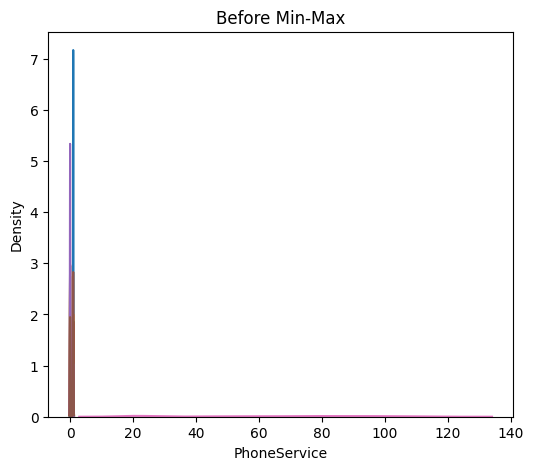

In [ ]:
# assessing to see if normalization is necessary
fig, ax1 = plt.subplots(figsize=(6, 5))

# Các đặc trưng cần kiểm tra
features = ['gender','PhoneService', 'MultipleLines_Yes', 'StreamingMovies_Yes','StreamingTV_Yes','SeniorCitizen','PaperlessBilling','MonthlyCharges']

# Thiết lập tiêu đề
ax1.set_title('Before Min-Max')

# Vẽ biểu đồ KDE cho từng đặc trưng
for feature in features:
    sns.kdeplot(churn_dum[feature], ax=ax1)

# Hiển thị biểu đồ
plt.show()

In [ ]:
# normalize x_data using the min max method
X = churn_dum[['PhoneService', 'MultipleLines_Yes', 'StreamingMovies_Yes','StreamingTV_Yes','SeniorCitizen','PaperlessBilling','MonthlyCharges']]
Y  = churn_dum['Churn']

for x in X:
    churn_dum[x] = (churn_dum[x] - min(churn_dum[x])) / (max(churn_dum[x]) - min(churn_dum[x]))
churn_dum.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,1,0,1,0.0,1.0,0.115423,29.85,0,...,0,0,0.0,0,0.0,0,0,0,1,0
1,1,0.0,0,0,34,1.0,0.0,0.385075,1889.50,0,...,0,0,0.0,0,0.0,1,0,0,0,1
2,1,0.0,0,0,2,1.0,1.0,0.354229,108.15,1,...,0,0,0.0,0,0.0,0,0,0,0,1


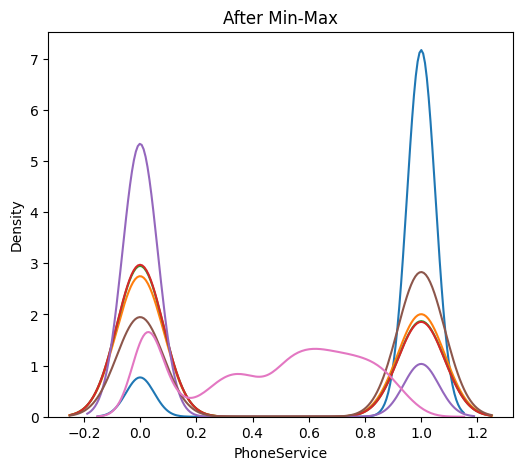

In [ ]:
# visualise the effect of normalization
fig, ax3 = plt.subplots(figsize=(6,5))
ax3.set_title('After Min-Max')
sns.kdeplot(churn_dum['PhoneService'], ax=ax3)
sns.kdeplot(churn_dum['MultipleLines_Yes'], ax=ax3)
sns.kdeplot(churn_dum['StreamingMovies_Yes'], ax=ax3)
sns.kdeplot(churn_dum['StreamingTV_Yes'], ax=ax3)
sns.kdeplot(churn_dum['SeniorCitizen'], ax=ax3)
sns.kdeplot(churn_dum['PaperlessBilling'], ax=ax3)
sns.kdeplot(churn_dum['MonthlyCharges'], ax=ax3)
plt.show()

## Tiến hành kiểm tra xem data có bị imbalance không?

In [ ]:
churn_dum.Churn.value_counts()

,count
Churn,
0,5174
1,1869


## Nhận xét:
### -  Dữ liệu đang có sự mất cân bằng (imbalance). Cụ thể, có 5174 khách hàng không hủy hợp đồng (Churn = 0) và 1869 khách hàng hủy hợp đồng (Churn = 1).



## Oversampling bằng SMOTE để xử lý data imbalance

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

In [ ]:
churn_dum

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,1,0,1,0.0,1.0,0.115423,29.85,0,...,0,0,0.0,0,0.0,0,0,0,1,0
1,1,0.0,0,0,34,1.0,0.0,0.385075,1889.50,0,...,0,0,0.0,0,0.0,1,0,0,0,1
2,1,0.0,0,0,2,1.0,1.0,0.354229,108.15,1,...,0,0,0.0,0,0.0,0,0,0,0,1
3,1,0.0,0,0,45,0.0,0.0,0.239303,1840.75,0,...,1,0,0.0,0,0.0,1,0,0,0,0
4,0,0.0,0,0,2,1.0,1.0,0.521891,151.65,1,...,0,0,0.0,0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,24,1.0,1.0,0.662189,1990.50,0,...,1,0,1.0,0,1.0,1,0,0,0,1
7039,0,0.0,1,1,72,1.0,1.0,0.845274,7362.90,0,...,0,0,1.0,0,1.0,1,0,1,0,0
7040,0,0.0,1,1,11,0.0,1.0,0.112935,346.45,0,...,0,0,0.0,0,0.0,0,0,0,1,0
7041,1,1.0,1,0,4,1.0,1.0,0.558706,306.60,1,...,0,0,0.0,0,0.0,0,0,0,0,1


In [ ]:
over=SMOTE(sampling_strategy=1)

x = churn_dum.drop(columns=['Churn'])
y = churn_dum['Churn']
x,y=over.fit_resample(x,y)

Counter(y)


Counter({0: 5174, 1: 5174})

## Chia tập dữ liệu thành 2 tập con train/test theo tỉ lệ 8:2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [ ]:
from pycaret.classification import *

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5788,0,0.0,1,0,4,0.0,1.0,0.068657,99.950000,1,...,0,0,0.0,0,0.0,0,0,0,1,0
7745,0,0.0,0,0,1,1.0,0.0,0.264598,44.842109,0,...,0,0,0.0,0,0.0,0,0,0,0,1
2157,1,0.0,1,0,51,1.0,1.0,0.881095,5498.800000,0,...,0,0,1.0,0,1.0,1,0,0,0,0
5010,0,0.0,0,0,61,1.0,0.0,0.700498,5321.250000,0,...,1,0,1.0,0,1.0,0,1,1,0,0
2949,0,0.0,0,0,56,1.0,1.0,0.417910,3282.750000,0,...,1,0,0.0,0,0.0,1,0,1,0,0


In [ ]:
y_train.head()

,Churn
5788,0
7745,1
2157,0
5010,0
2949,0


In [ ]:
clf = setup(data = X_train,
             target = y_train,
             train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             fix_imbalance=True,
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             verbose = False)

> # 3 - Tìm mô hình tốt nhất trên tập train, theo tiêu chí F1 Score, 5-fold cross validation. Tuning mô hình vừa tìm.

In [ ]:
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8482,0.9323,0.8466,0.8498,0.8480,0.6965,0.6968,1.8160
gbc,Gradient Boosting Classifier,0.8446,0.9326,0.8562,0.8370,0.8464,0.6892,0.6896,1.4080
rf,Random Forest Classifier,0.8473,0.9241,0.8324,0.8584,0.8450,0.6947,0.6953,1.3820
ada,Ada Boost Classifier,0.8363,0.9252,0.8647,0.8183,0.8408,0.6726,0.6739,0.6780
xgboost,Extreme Gradient Boosting,0.8390,0.9259,0.8363,0.8410,0.8386,0.6780,0.6782,0.6940
et,Extra Trees Classifier,0.8330,0.9077,0.8269,0.8373,0.8319,0.6660,0.6663,1.1620
lr,Logistic Regression,0.8215,0.9091,0.8396,0.8106,0.8246,0.6430,0.6439,3.4340
ridge,Ridge Classifier,0.8183,0.9058,0.8433,0.8037,0.8227,0.6367,0.6380,0.3860
lda,Linear Discriminant Analysis,0.8180,0.9061,0.8411,0.8044,0.8221,0.6361,0.6373,0.6720
svm,SVM - Linear Kernel,0.8149,0.9088,0.8514,0.7960,0.8213,0.6297,0.6342,0.4160


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Nhận xét:

### - Mô hình tốt nhất trên tập train theo tiêu chí F1 Score là là mô hình Light Gradient Boosting Machine (lightgbm) với F1 Score là 0.8480

In [ ]:
lightgbm = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8528,0.9325,0.8431,0.8600,0.8515,0.7057,0.7058
1,0.8460,0.9348,0.8263,0.8601,0.8428,0.6921,0.6926
2,0.8421,0.9278,0.8550,0.8336,0.8441,0.6843,0.6845
3,0.8565,0.9395,0.8640,0.8512,0.8576,0.7130,0.7131
4,0.8331,0.9219,0.8112,0.8483,0.8293,0.6662,0.6668
Mean,0.8461,0.9313,0.8399,0.8506,0.8451,0.6922,0.6926
Std,0.0082,0.0060,0.0191,0.0097,0.0095,0.0165,0.0163


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm = tune_model(lightgbm, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8498,0.9323,0.8492,0.8505,0.8498,0.6996,0.6996
1,0.8506,0.9378,0.8384,0.8591,0.8486,0.7011,0.7013
2,0.8338,0.9269,0.8535,0.8212,0.8370,0.6677,0.6682
3,0.8640,0.9403,0.8701,0.8597,0.8649,0.7281,0.7281
4,0.8399,0.9247,0.8172,0.8560,0.8362,0.6798,0.6805
Mean,0.8476,0.9324,0.8457,0.8493,0.8473,0.6953,0.6956
Std,0.0103,0.0060,0.0175,0.0144,0.0104,0.0207,0.0204


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


### - Mô hình sau khi tuned có F1 Score trung bình là 0.8473, thấp hơn một chút so với F1 Score trung bình của mô hình ban đầu là 0.8480. Vì vậy, mô hình sau khi tuned không tốt hơn mô hình gốc dựa trên tiêu chí F1 Score.

> # 4 - Vẽ confusion_matrix, learning curve, feature importance graph. Nhận xét

## Learning curve

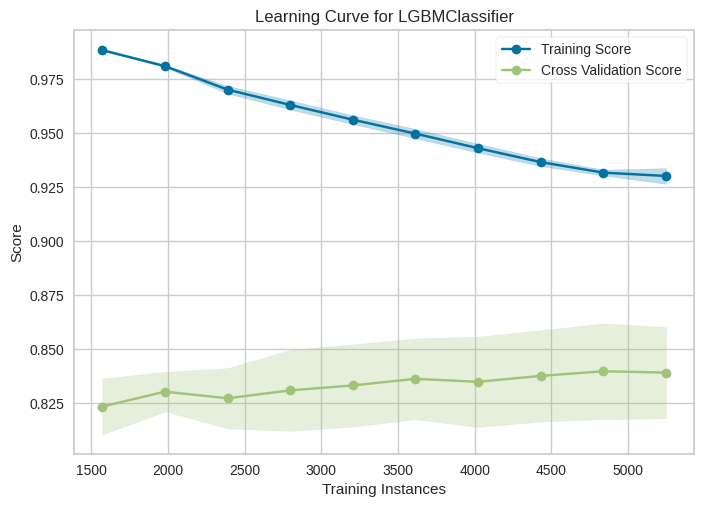

In [ ]:
plot_model(estimator = lightgbm, plot = 'learning')

## Nhận xét:

### - Training Score: Bắt đầu cao và giảm dần khi dữ liệu huấn luyện tăng, cho thấy mô hình có khả năng overfitting ban đầu nhưng vẫn khớp tốt với dữ liệu huấn luyện.

### - Cross Validation Score: Điểm số của tập cross-validation ổn định nhưng thấp hơn đáng kể so với Training Score, cho thấy mô hình có thể chưa tổng quát hóa tốt trên dữ liệu mới.

### hoảng cách giữa hai đường biểu diễn này chỉ ra rằng mô hình vẫn có một chút overfitting, nhưng không nghiêm trọng, có thể cân nhắc điều chỉnh tham số hoặc sử dụng thêm kỹ thuật giảm overfitting.

## Confusion_matrix


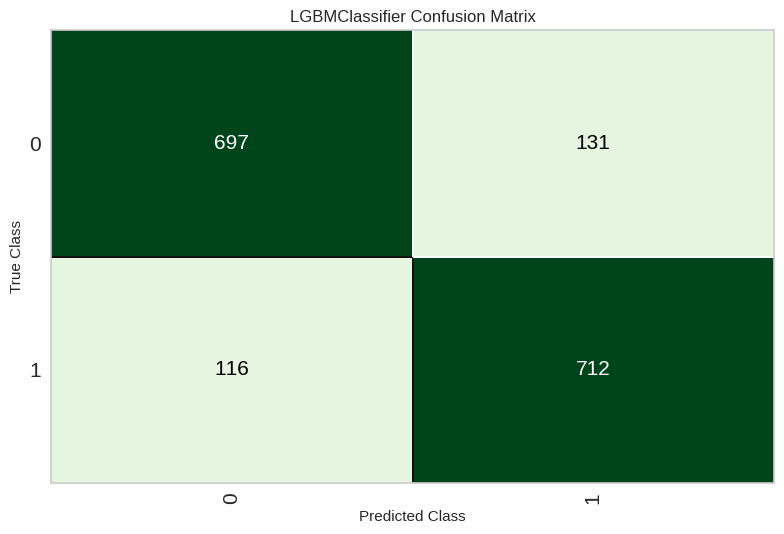

In [ ]:
plot_model(estimator = lightgbm, plot = 'confusion_matrix')

## Nhận xét:

### - 712 True Positives và 697 True Negatives cho thấy mô hình dự đoán đúng phần lớn khách hàng hủy và không hủy hợp đồng.
### - 131 False Positives và 116 False Negatives cho thấy mô hình vẫn có một số lỗi, đặc biệt trong việc phân biệt giữa hai lớp.
## Với số lượng False Positives và False Negatives gần nhau, mô hình có sự cân bằng giữa hai lỗi, nhưng có thể cần cải thiện thêm nếu yêu cầu về độ chính xác hoặc tỷ lệ Recall của mô hình cao hơn.

## Feature Importance

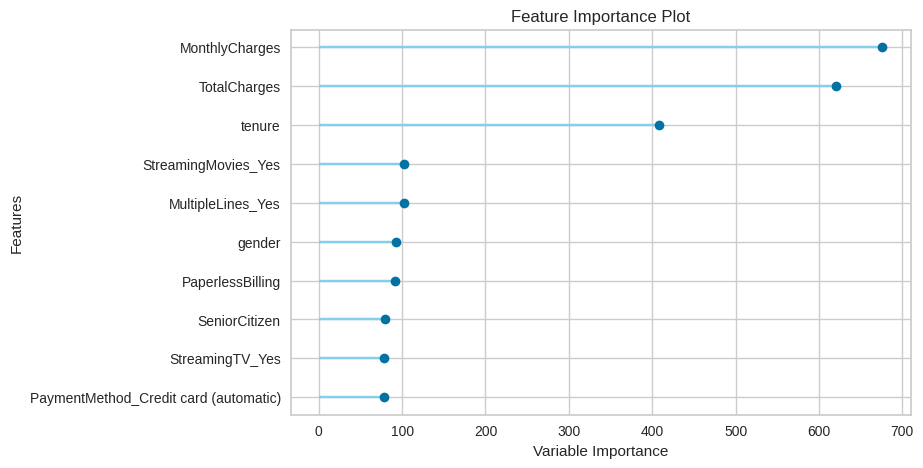

In [ ]:
plot_model(estimator = lightgbm, plot = 'feature')

## Nhận xét:

### - MonthlyCharges và TotalCharges là các đặc trưng có ảnh hưởng lớn nhất, cho thấy mô hình dựa rất nhiều vào yếu tố tài chính để dự đoán khả năng hủy hợp đồng. Điều này cho thấy chiến lược giá cả và chi phí tổng thể có thể là nguyên nhân chính dẫn đến quyết định hủy hợp đồng. Do đó, việc điều chỉnh chiến lược giá hoặc cung cấp các ưu đãi cho các nhóm khách hàng có chi phí cao có thể giảm tỷ lệ churn.

### - Các biến khác như Tenure (thời gian khách hàng gắn bó) cũng có ảnh hưởng đáng kể, cho thấy sự quan trọng của thời gian khách hàng đã sử dụng dịch vụ trong việc dự đoán hành vi rời bỏ. Từ đó, doanh nghiệp có thể tập trung vào các chương trình khách hàng trung thành hoặc gia tăng giá trị dịch vụ để kéo dài thời gian gắn bó của khách hàng.


# 5 - Tính toán performance của model trên tập test

In [ ]:
# Dự đoán trên tập test
predictions_test = predict_model(lightgbm, data=X_valid)

# Tính toán các chỉ số hiệu suất
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(predictions_test.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'prediction_label', 'prediction_score'],
      dtype='object')


In [ ]:
y_pred = predictions_test['prediction_label']


In [ ]:
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8478260869565217
Precision: 0.8428571428571429
Recall: 0.855072463768116
F1 Score: 0.8489208633093526
